In [56]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()  

1.13.1


In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
#Used for plotting images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']


In [59]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))


Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

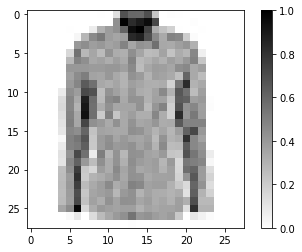

In [61]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [65]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3965 - acc: 0.8573
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2616 - acc: 0.9027
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2174 - acc: 0.9192
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1836 - acc: 0.9322
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1584 - acc: 0.9419
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1341 - acc: 0.9507
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1133 - acc: 0.9584
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0938 - acc: 0.9647
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0800 - acc: 0.9702
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0674 - acc: 0.9758


In [66]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))


313/313 [==============================] - 2s 7ms/step - loss: 0.3185 - acc: 0.9161


In [67]:
print("The Testing Loss is {}\nThe Accuracy with testing data is {}".format(test_loss,test_accuracy))

The Testing Loss is 0.318455292698228
The Accuracy with testing data is 0.916100025177002


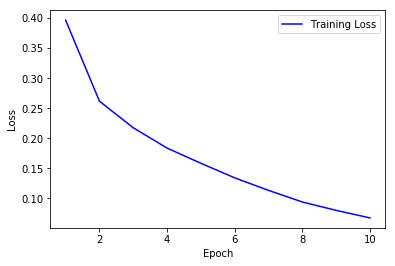

In [68]:
# Visualize loss history
plt.plot([1,2,3,4,5,6,7,8,9,10], history.history['loss'], 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();